# Prepare dataset for training

In [55]:
import os, shutil, pathlib
import cv2
import numpy as np

In [56]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs")

In [57]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        if os.path.exists(dir):
            print(f'{dir} exists. Abort making subset.')
            continue
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range (start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)
            

In [58]:
make_subset("train", start_index = 0, end_index = 1000)
make_subset("validation", start_index = 1000, end_index = 1500)
make_subset("test", start_index = 1500, end_index = 2500)

cats_vs_dogs\train\cat exists. Abort making subset.
cats_vs_dogs\train\dog exists. Abort making subset.
cats_vs_dogs\validation\cat exists. Abort making subset.
cats_vs_dogs\validation\dog exists. Abort making subset.
cats_vs_dogs\test\cat exists. Abort making subset.
cats_vs_dogs\test\dog exists. Abort making subset.


# Building a model

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
print(keras.__version__)

2.6.0


In [29]:
tf.test.is_gpu_available()
#tf.test.is_built_with_cuda()

True

In [30]:
print(" Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

 Num GPUs Available:  1


In [62]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [63]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 41, 41, 128)       7385

In [64]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [65]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(new_base_dir / "train" , image_size = (180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation" , image_size = (180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test" , image_size = (180, 180), batch_size=32)



Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [66]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss")]

In [67]:
history = model.fit(train_dataset, epochs=30, validation_data= validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 4s 45ms/step - loss: 0.7676 - accuracy: 0.5015 - val_loss: 0.6889 - val_accuracy: 0.5220
Epoch 2/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6979 - accuracy: 0.5530 - val_loss: 0.6750 - val_accuracy: 0.5880
Epoch 3/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6867 - accuracy: 0.5645 - val_loss: 0.6621 - val_accuracy: 0.5940
Epoch 4/30
63/63 [==============================] - 3s 42ms/step - loss: 0.6523 - accuracy: 0.6505 - val_loss: 0.6362 - val_accuracy: 0.6190
Epoch 5/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6126 - accuracy: 0.6650 - val_loss: 0.6043 - val_accuracy: 0.6720
Epoch 6/30
63/63 [==============================] - 3s 42ms/step - loss: 0.5833 - accuracy: 0.6915 - val_loss: 0.6214 - val_accuracy: 0.6710
Epoch 7/30
63/63 [==============================] - 3s 42ms/step - loss: 0.5481 - accuracy: 0.7250 - val_loss: 0.6517 - val_accuracy: 0.6520
Epoch 8/30
63

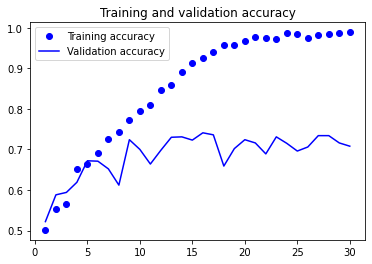

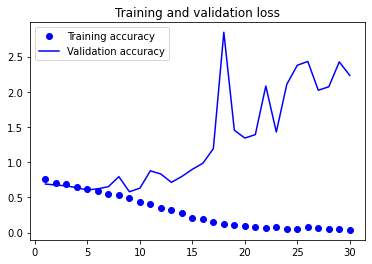

In [68]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training accuracy")
plt.plot(epochs, val_loss, "b", label="Validation accuracy")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [69]:
from tensorflow import keras

model = keras.models.load_model('convnet_from_scratch.keras')
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 41, 41, 128)       7385

In [70]:
import cv2
import numpy as np

test_bgr1 = cv2.imread('cats_vs_dogs/test/cat/cat.1529.jpg')
test_bgr2 = cv2.imread('cats_vs_dogs/test/dog/dog.1689.jpg')
test_img1 = cv2.cvtColor(test_bgr1, cv2.COLOR_BGR2RGB)
test_img2 = cv2.cvtColor(test_bgr2, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(test_img1, (180, 180))
img2 = cv2.resize(test_img2, (180, 180))

imgs = np.array([img1, img2])
pred = model.predict(np.expand_dims(img1, axis=0))
preds = model.predict(imgs)


In [71]:
pred

array([[0.4439568]], dtype=float32)

In [72]:
preds

array([[0.4439611],
       [0.4810843]], dtype=float32)

# Using VGG16 as feature extractor

In [74]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [75]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [76]:
train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)


In [77]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 22.1177 - accuracy: 0.9205 - val_loss: 5.8576 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 2.9536 - accuracy: 0.9785 - val_loss: 4.5830 - val_accuracy: 0.9670
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.3473 - accuracy: 0.9840 - val_loss: 5.7122 - val_accuracy: 0.9690
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.9186 - accuracy: 0.9850 - val_loss: 5.6396 - val_accuracy: 0.9690
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.9935 - val_loss: 7.1911 - val_accuracy: 0.9690
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8686 - accuracy: 0.9955 - val_loss: 6.2034 - val_accuracy: 0.9670
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.1638 - accuracy: 0.9985 - val_loss: 5.3856 - val_accuracy: 0.9710
Epoch 8/20
63/63 [

In [78]:
from tensorflow import keras

model = keras.models.load_model('feature_extraction.keras')
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 5, 5, 512)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               3277056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


In [79]:
import cv2
import numpy as np

test_bgr1 = cv2.imread('cats_vs_dogs/test/cat/cat.1529.jpg')
test_bgr2 = cv2.imread('cats_vs_dogs/test/dog/dog.1689.jpg')
test_img1 = cv2.cvtColor(test_bgr1, cv2.COLOR_BGR2RGB)
test_img2 = cv2.cvtColor(test_bgr2, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(test_img1, (180, 180))
img2 = cv2.resize(test_img2, (180, 180))

imgs = np.array([img1, img2])
features = conv_base.predict(imgs)
preds = model.predict(features)


In [80]:
preds

array([[0.],
       [1.]], dtype=float32)